# XRD Calibration
---

using diffraction patterns from database

$f = \dfrac{1}{f_{\max}}\displaystyle\sum_j f_j $

$f_j = I_j \gamma_j e^{\dfrac{-\frac{1}{2}(x-(\mu_j+\Delta_j))^2}{\sigma_j^2}}$

where $I$ is the intensity, $\gamma$ if correction to intensity 

$f = \dfrac{1}{f_{\max}}  \displaystyle\sum_j I_j \gamma_j e^{\dfrac{-\frac{1}{2}(x-(\mu_j+\Delta_j))^2}{\sigma_j^2}}$

$\dfrac{\partial f}{\partial \sigma^2_j} = \dfrac{\partial f_j}{\partial \sigma^2_j} - f_j\dfrac{1}{{f_\max}^2}\dfrac{\partial f_{\max}}{\partial \sigma^2_j} $

since $f_\max = 1$

$\dfrac{\partial f}{\partial \sigma^2_j} = \dfrac{\partial f_j}{\partial \sigma^2_j} - f_j\dfrac{\partial f_{\max}}{\partial \sigma^2_j} $

$\dfrac{\partial f_j}{\partial \sigma^2_j} = \dfrac{1}{2}\dfrac{[x-(\mu_j+\Delta_j)]^2}{\sigma_j^4}f_j$

following the above

$\dfrac{\partial f_j}{\partial \gamma_j} = I_j e^{\dfrac{-\frac{1}{2}(x-(\mu_j+\Delta_j))^2}{\sigma_j^2}} $

$\dfrac{\partial f_j}{\partial \Delta_j} = \dfrac{x - (\mu + \Delta)}{\sigma^2} f_j$

---

Rewriting $x$ as a function of the calibration curve

$f_j = I_j \gamma_j e^{-\dfrac{\frac{1}{2}(g(\Omega;a,b,c,d)-\mu_j)^2}{\sigma_j^2}}$

here $\Omega$ denotes channels

$x \equiv g(\Omega) = a + b\Omega + c\Omega^2 + d\Omega^3$ 

$f_j = I_j \gamma_j e^{-\dfrac{\frac{1}{2}(a + b\Omega + c\Omega^2 + d\Omega^3-\mu_j)^2}{\sigma_j^2}}$

$\dfrac{\partial f_j}{\partial a} = -\dfrac{ 1}{\sigma_j^2}(a + b\Omega + c\Omega^2 + d\Omega^3 - \mu_j) f_j$

$= -\dfrac{ 1}{\sigma_j^2}(g(\Omega) - \mu_j) f_j$

$\dfrac{\partial f_j}{\partial b} = -\dfrac{ \Omega (g(\Omega) - \mu_j) }{\sigma_j^2}f_j  $

$\dfrac{\partial f_j}{\partial c} = -\dfrac{ \Omega^2 (g(\Omega) - \mu_j) }{\sigma_j^2}f_j  $

$\dfrac{\partial f_j}{\partial d} = -\dfrac{ \Omega^3 (g(\Omega) - \mu_j) }{\sigma_j^2}f_j  $

---

Geometric fucntion

$\theta = \dfrac{180}{\pi} \tan^{-1}\left(\dfrac{x + a}{s}\right) + \beta$



$x$ and $a$ in the units of channels. $s$ is also in the units of channels and it rescales the detector range.
$\beta[^\circ]$ is an angle.

$\dfrac{\partial\theta}{\partial s} = -\dfrac{180}{\pi} \dfrac{a+x}{a^2+2ax+s^2+x^2}= -\dfrac{180}{\pi} \dfrac{a+x}{(a+x)^2+s^2}$

$\dfrac{\partial\theta}{\partial a} = \dfrac{180}{\pi} \dfrac{s}{a^2+2ax+s^2+x^2} = \dfrac{180}{\pi} \dfrac{s}{(a+x)^2+s^2}$

$\dfrac{\partial\theta}{\partial \beta} = 1$

$\theta = \dfrac{180}{\pi}\left[ \tan^{-1}\left(\dfrac{x + a}{z\sin\left(\beta\right)}\right) + \beta\right]$

here $\beta$ is in radians

$\dfrac{\partial\theta}{\partial z} = -\dfrac{180}{\pi}\dfrac{(a + x) \csc(\beta)}{z^2 + (a + x)^2 \csc^2(\beta)}$

$\dfrac{\partial\theta}{\partial a} = \dfrac{180}{\pi}\dfrac{z \csc(\beta)}{z^2 + (a + x)^2 \csc^2(\beta))}$

$\dfrac{\partial\theta}{\partial \beta} = \dfrac{180}{\pi} \left[ 1 - \dfrac{z (a + x) \cot(\beta) \csc(\beta)}{z^2 + (a + x)^2 \csc^2(\beta)} \right]$

Rewriting $x$ as a function of the calibration curve

$f_j = I_j \gamma_j e^{-\dfrac{\frac{1}{2}(g(\Omega;a,b,s)-\mu_j)^2}{\sigma_j^2}}$

here $\Omega$ denotes channels

$x \equiv g(\Omega) = \dfrac{180}{\pi} \tan^{-1}\left(\dfrac{\Omega + a}{s}\right) + \beta$ 

$f_j = I_j \gamma_j e^{-\dfrac{\frac{1}{2}\left[\dfrac{180}{\pi} \tan^{-1}\left(\dfrac{\Omega + a}{s}\right) + \beta-\mu_j\right]^2}{\sigma_j^2}}$

$\dfrac{\partial f_j}{\partial a} = -\dfrac{ 1}{\sigma_j^2}\dfrac{\partial g(\Omega)}{\partial a}(g(\Omega) - \mu_j) f_j$

In [170]:
from src.database import DatabaseXRD,snip
from numpy import newaxis,loadtxt,diag,arange,linspace,sin,concatenate,array,exp,pi,zeros,ones,prod,newaxis,arctan,savetxt,c_,fabs,sqrt,concatenate
from numpy.random import normal
from numpy.linalg import pinv,inv
from scipy.optimize import curve_fit,least_squares
from scipy.interpolate import interp1d
from scipy.signal import find_peaks

from matplotlib.pyplot import plot,show,vlines,xlim,ylim,figure,semilogx,scatter,xlabel,ylabel

from glob import glob

from scipy import signal
from numpy import fft,pad,concatenate,stack

In [171]:
class Spectra():

    def __init__(self,file=None):
        if file:
            self.read_from_file(file)
            
        self.opt = array([-1264.,51.,2061.])
        self.a,self.beta,self.s = self.opt[:,newaxis]
    
    def read_from_file(self,file):
        
        self.raw_theta,self.raw_intensity = loadtxt(file,unpack=True)
        self.channel = arange(1280)
        
        self.intensity = self.raw_intensity/self.raw_intensity.max()
        
    def fce_calibration(self,x,a,beta,s):
        return (arctan((x+a)/s)) * 180 / pi + beta
    
    def fce_calibration_z(self,x,a,b,z):
        return (arctan((x+a)/(z*sin(b))) + b) * 180 / pi
    
    def calibrate_from_file(self,file):           
        
        x,y = loadtxt(file,unpack=True)
        self.opt,(opt_var) = curve_fit(self.fce_calibration,x,y)
        
        self.a,self.beta,self.s = self.opt[:,newaxis]
               
        return self
    
    @property
    def theta(self):
        return self.fce_calibration(self.channel,*self.opt)
    
    def snip(self,m = 24):

        y = self.intensity
        y = y - snip(y,m)
        self.intensity = y/y.max()
        
        return self
    
    def convolve(self,w=24):
        off = 4 * w
        kernel = signal.windows.gaussian(2*off-1,w)

        y = self.intensity
        y_pad = pad(y,(off,off),'edge')

        f = fft.rfft(y_pad)
        w = fft.rfft(kernel,y_pad.shape[-1])
        y = fft.irfft(w * f)

        y = y[off*2:]
        self.intensity = y/y.max()
        
        return self
        

In [931]:
class GaussNewton():
    
    def __init__(self,phase,spectra):
        
        if isinstance(phase,list):
            self.phase = phase
        else:
            self.phase = [phase]
            
        self.spectra = spectra
            
        self.mu = []
        self.intensity = []
        
        for p in self.phase:
            p.get_theta(l=[1.541,1.391],scale=[1.0,0.008])     
            f = (p.theta < 50) & (p.intensity > 0.005)      
        
            self.mu += list(p.theta[f])
            self.intensity += list(p.intensity[f])
            
        self.mu,self.intensity = array(sorted(zip(self.mu,self.intensity))).T
        
        self.n_peaks = len(self.mu)
        self.params = zeros(self.n_peaks * 2)
        self.sigma = self.params[:self.n_peaks]
        self.gamma = self.params[self.n_peaks:]
   
        self.sigma[:] = 0.1
        self.gamma[:] = 1
        
        self._z()

    def gauss(self,x,mu,sigma):
        return exp(-0.5 * (x - mu)**2 / sigma**2)
    
    def _z(self):
        
        self.z = zeros(len(self.spectra.channel))
        
        x = self.spectra.theta
        
        for mu,I,sigma,gamma in zip(self.mu,self.intensity,self.sigma,self.gamma):

            c = self.gauss(x,mu,sigma)
            h = fabs(gamma) * I * c
            self.z += h
            
        self.z = self.z/self.z.max()
        
        return x,self.z
    
    def dsigma(self,x,mu,sigma):
        return (x - mu)**2 / sigma**3
    
    def da(self,channel,x,a,s,mu,sigma):
        return -1.0 / sigma**2 * 180 / pi * s / ((a + channel)**2+s**2) * (x - mu)
    
    def ds(self,channel,x,a,s,mu,sigma):
        return 1.0 / sigma**2 * 180 / pi * (a + channel) / ((a + channel)**2 + s**2) * (x - mu)
    
    def dbeta(self,x,mu,sigma):
        return -1.0 / sigma**2 * (x - mu)

    def iter_sigma(self,alpha = 1):
        """
        Iterate sigma*2 and gamma.
        """

        dsigma = []
        
        z = zeros(len(self.spectra.channel))
        z2 = zeros(len(self.spectra.channel))
        
        """
        x,y
        """
        x = self.spectra.theta
        y = self.spectra.intensity
        """
        Loop over all peaks
        """
        
        for mu,I,sigma,gamma in zip(self.mu,self.intensity,self.sigma,self.gamma):

            c = self.gauss(x,mu,sigma)
            h = gamma * I * c
            z += h
            
            dsigma += [h * self.dsigma(x,mu,sigma)]
            
        d = dsigma
        
        z = z/z.max()
        jmax = z.argmax()
        dz = y - z

        d = array(d).T
        
        dfmax = z[:,newaxis] * d[jmax]
        d = d - dfmax
        
        dr = pinv(d) @ dz
        
        self.sigma[:] += dr * alpha
        
        self.dz = dz
        self.dr = dr
        
    def iter_gamma(self,alpha = 1):
        """
        Iterate sigma*2 and gamma.
        """

        dgamma = []
        
        z = zeros(len(self.spectra.channel))
        
        """
        x,y
        """
        x = self.spectra.theta
        y = self.spectra.intensity
        """
        Loop over all peaks
        """
        
        for mu,I,sigma,gamma in zip(self.mu,self.intensity,self.sigma,self.gamma):

            c = self.gauss(x,mu,sigma)
            h = gamma * I * c
            z += h
            
            #dgamma += [gamma / fabs(gamma) * I * c]
            dgamma += [I * c]
            
        d = dgamma
        
        jmax = z.argmax()
                
        z = z/z.max()
        dz = y - z

        d = array(d).T
        
        dfmax = z[:,newaxis] * d[jmax]
        d = d - dfmax

        dr = pinv(d) @ dz

        self.gamma[:] += dr * alpha
        
        self.dz = dz
        self.dr = dr
    
    def iter_sigma_gamma(self,alpha = 1):
        """
        Iterate sigma and gamma.
        """

        dsigma = []
        dgamma = []
        
        z = zeros(len(self.spectra.channel))
        z2 = zeros(len(self.spectra.channel))
        
        """
        x,y
        """
        x = self.spectra.theta
        y = self.spectra.intensity
        """
        Loop over all peaks
        """
        
        for mu,I,sigma,gamma in zip(self.mu,self.intensity,self.sigma,self.gamma):

            c = self.gauss(x,mu,sigma)
            h = gamma * I * c
            z += h
            
            dsigma += [h * self.dsigma(x,mu,sigma)]
            #dgamma += [gamma / fabs(gamma) * I * c]
            dgamma += [I * c]
            
        d = dsigma + dgamma
        
        z = z/z.max()
        jmax = z.argmax()
        dz = y - z

        d = array(d).T
        
        dfmax = z[:,newaxis] * d[jmax]
        d = d - dfmax

        dr = pinv(d) @ dz
        
        self.params[:] += dr * alpha
        
        self.dz = dz
        self.dr = dr
        
    def calibration(self,alpha = 1.0):

        dopt = zeros((3,len(self.spectra.channel)))     
        z = zeros(len(self.spectra.channel))
        
        da,dbeta,ds = dopt[:]

        """
        Loop over all peaks
        """
        x = self.spectra.theta
        y = self.spectra.intensity
        
        for mu,I,sigma,gamma in zip(self.mu,self.intensity,self.sigma,self.gamma):

            c = self.gauss(x,mu,sigma)
            #h = fabs(gamma) * I * c
            h = gamma * I * c
            z += h
                
            da += h * self.da(self.spectra.channel,x,*self.spectra.a,*self.spectra.s,mu,sigma)
            dbeta += h * self.dbeta(x,mu,sigma)
            ds += h * self.ds(self.spectra.channel,x,*self.spectra.a,*self.spectra.s,mu,sigma)
            
        d = dopt
        
        z = z/z.max()
        jmax = z.argmax()
        dz = y - z
        
        d = array(d).T
        
        dfmax = z[:,newaxis] * d[jmax]
        d = d - dfmax

        dr = pinv(d) @ dz
        
        self.spectra.opt += dr * alpha
        
        self.dz = dz
        self.dr = dr
        
        
    def min_all(self,alpha = 1.0):
        
        dsigma = []
        dgamma = []

        dopt = zeros((3,len(self.spectra.channel)))     
        z = zeros(len(self.spectra.channel))
        
        da,dbeta,ds = dopt[:]

        """
        Loop over all peaks
        """
        x = self.spectra.theta
        y = self.spectra.intensity
        
        for mu,I,sigma,gamma in zip(self.mu,self.intensity,self.sigma,self.gamma):

            c = self.gauss(x,mu,sigma)
            #h = fabs(gamma) * I * c
            h = fabs(gamma) * I * c
            z += h
                
            dsigma += [h * self.dsigma(x,mu,sigma)]
            #dgamma += [gamma / fabs(gamma) * I * c]
            dgamma += [I * c]
                
            da += h * self.da(self.spectra.channel,x,*self.spectra.a,*self.spectra.s,mu,sigma)
            dbeta += h * self.dbeta(x,mu,sigma)
            ds += h * self.ds(self.spectra.channel,x,*self.spectra.a,*self.spectra.s,mu,sigma)
            
        d = list(dopt) + dsigma + dgamma
        
        z = z/z.max()
        jmax = z.argmax()
        dz = y - z
        
        d = array(d).T
        
        dfmax = z[:,newaxis] * d[jmax]
        d = d - dfmax

        dr = pinv(d) @ dz
        
        #dr[3:self.n_peaks + 3] *= 0.125
        
        self.params += dr[3:] * alpha
        self.spectra.opt += dr[:3] * alpha
        
        self.dz = dz
        self.dr = dr 

In [932]:
d = DatabaseXRD().read_cifs('Database/')

calcite = d['Calcite'][0]
hydrocerussite = d['Hydrocerussite'][0]
cinnabar = d['Cinnabar'][0]
spinel = d['Spinel'][0]
barite = d['Barite'][0]

In [933]:
xrd_hydrocerussite = Spectra('Cappello/Hydrocerussite/roi_0.dat')
xrd_hydrocerussite.calibrate_from_file('Cappello/Calibrazione1.txt').convolve(1).snip()

In [934]:
xrd_cinnabar_hydrocerussite = Spectra('Cappello/Cinnabar_Hydrocerussite/roi_0.dat')
xrd_cinnabar_hydrocerussite.calibrate_from_file('Cappello/Calibrazione1.txt').convolve(2).snip()

In [935]:
xrd_spinel_barite = Spectra('Cappello/Spinel_Barite/roi_0.dat')
xrd_spinel_barite.calibrate_from_file('Cappello/Calibrazione1.txt').convolve(1).snip()

In [936]:
xrd_calcite = Spectra('Data/roi_0.dat')
xrd_calcite.calibrate_from_file('Data/Calibration.ini').convolve(1).snip()

In [937]:
g1 = GaussNewton(hydrocerussite,xrd_hydrocerussite)
g2 = GaussNewton([hydrocerussite,cinnabar],xrd_cinnabar_hydrocerussite)
g3 = GaussNewton([spinel,barite],xrd_spinel_barite)
g4 = GaussNewton(calcite,xrd_calcite)

In [938]:
for _ in range(24):
    g1.iter_gamma(alpha=1)
g1.params,g1.sigma,g1.gamma

(array([0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 1.        ,
        0.04518696, 0.1057259 , 1.55859101, 2.62028709, 0.16943014,
        0.29195075, 0.95946613, 2.64483945, 1.18940102, 0.40474408,
        1.37972618, 0.21608893, 0.62224179, 1.62867467, 0.33680079,
        1.94914683, 0.38110502, 0.59741916]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
        0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
 array([1.        , 0.04518696, 0.1057259 , 1.55859101, 2.62028709,
        0.16943014, 0.29195075, 0.95946613, 2.64483945, 1.18940102,
        0.40474408, 1.37972618, 0.21608893, 0.62224179, 1.62867467,
        0.33680079, 1.94914683, 0.38110502, 0.59741916]))

In [939]:
for _ in range(24):
    g1.iter_sigma(alpha=0.1)
g1.params,g1.sigma,g1.gamma

(array([0.1       , 0.31285385, 0.21764302, 0.36343375, 1.40968068,
        0.17686993, 0.16719632, 0.16867642, 0.15052793, 0.14014512,
        0.17770889, 0.1233526 , 0.2200792 , 0.10179087, 0.1634511 ,
        0.26902185, 0.26737507, 0.20935786, 0.19429779, 1.        ,
        0.04518696, 0.1057259 , 1.55859101, 2.62028709, 0.16943014,
        0.29195075, 0.95946613, 2.64483945, 1.18940102, 0.40474408,
        1.37972618, 0.21608893, 0.62224179, 1.62867467, 0.33680079,
        1.94914683, 0.38110502, 0.59741916]),
 array([0.1       , 0.31285385, 0.21764302, 0.36343375, 1.40968068,
        0.17686993, 0.16719632, 0.16867642, 0.15052793, 0.14014512,
        0.17770889, 0.1233526 , 0.2200792 , 0.10179087, 0.1634511 ,
        0.26902185, 0.26737507, 0.20935786, 0.19429779]),
 array([1.        , 0.04518696, 0.1057259 , 1.55859101, 2.62028709,
        0.16943014, 0.29195075, 0.95946613, 2.64483945, 1.18940102,
        0.40474408, 1.37972618, 0.21608893, 0.62224179, 1.62867467,
        0.33

In [956]:
for _ in range(24):
    g1.iter_sigma_gamma(alpha=1)
g1.params,g1.sigma,g1.gamma

596 596
596 596
596 596
596 596
596 596
596 596
596 596
596 596
596 596
596 596
596 596
596 596
596 596
596 596
596 596
596 596
596 596
596 596
596 596
596 596
596 596
596 596
596 596
596 596


(array([ 7.09746964e-01,  4.36746920e+00,  1.99631584e-01, -3.22319247e-01,
         4.44881415e+01,  1.93557946e-01,  1.81152212e-01,  1.75602444e-01,
         1.66479454e-01,  1.28663233e-01,  1.29970923e-01, -4.23035895e-01,
         2.45233849e-01,  8.34335752e-02,  2.08003501e-01,  3.26801359e-01,
         5.08908391e-01,  2.27475561e-01,  2.39682804e-01, -2.77218975e+00,
        -1.07536990e+04,  1.70654896e+04, -1.04732903e+06,  5.27302935e+05,
         5.11643482e+04,  8.65831321e+04,  2.33004848e+05,  9.55270040e+05,
         3.22480654e+05,  7.73160723e+04, -6.35532789e+04,  4.69425068e+04,
         6.53758407e+04,  4.46026049e+05,  7.26790014e+04,  2.30987650e+05,
         7.59674043e+04,  1.55842722e+05]),
 array([ 0.70974696,  4.3674692 ,  0.19963158, -0.32231925, 44.48814147,
         0.19355795,  0.18115221,  0.17560244,  0.16647945,  0.12866323,
         0.12997092, -0.42303589,  0.24523385,  0.08343358,  0.2080035 ,
         0.32680136,  0.50890839,  0.22747556,  0.239

In [957]:
for _ in range(24):
    g1.calibration(alpha=1)
g1.params,g1.sigma,g1.gamma

(array([ 7.09746964e-01,  4.36746920e+00,  1.99631584e-01, -3.22319247e-01,
         4.44881415e+01,  1.93557946e-01,  1.81152212e-01,  1.75602444e-01,
         1.66479454e-01,  1.28663233e-01,  1.29970923e-01, -4.23035895e-01,
         2.45233849e-01,  8.34335752e-02,  2.08003501e-01,  3.26801359e-01,
         5.08908391e-01,  2.27475561e-01,  2.39682804e-01, -2.77218975e+00,
        -1.07536990e+04,  1.70654896e+04, -1.04732903e+06,  5.27302935e+05,
         5.11643482e+04,  8.65831321e+04,  2.33004848e+05,  9.55270040e+05,
         3.22480654e+05,  7.73160723e+04, -6.35532789e+04,  4.69425068e+04,
         6.53758407e+04,  4.46026049e+05,  7.26790014e+04,  2.30987650e+05,
         7.59674043e+04,  1.55842722e+05]),
 array([ 0.70974696,  4.3674692 ,  0.19963158, -0.32231925, 44.48814147,
         0.19355795,  0.18115221,  0.17560244,  0.16647945,  0.12866323,
         0.12997092, -0.42303589,  0.24523385,  0.08343358,  0.2080035 ,
         0.32680136,  0.50890839,  0.22747556,  0.239

In [958]:
for _ in range(24):
    g1.min_all(alpha=1)
g1.params,g1.sigma,g1.gamma

(array([ 7.09746956e-01,  4.36743906e+00,  1.99631395e-01, -3.22320272e-01,
         4.44881740e+01,  1.93557866e-01,  1.81152190e-01,  1.75602472e-01,
         1.66479471e-01,  1.28663289e-01,  1.29970980e-01, -4.23041719e-01,
         2.45234027e-01,  8.34332763e-02,  2.08003553e-01,  3.26801366e-01,
         5.08908131e-01,  2.27475954e-01,  2.39682740e-01, -2.77218975e+00,
        -1.07540751e+04,  1.70659608e+04, -1.04737156e+06,  5.27317375e+05,
         5.11657849e+04,  8.65855418e+04,  2.33011274e+05,  9.55295234e+05,
         3.22490394e+05,  7.73181887e+04, -6.35589258e+04,  4.69437947e+04,
         6.53775938e+04,  4.46038355e+05,  7.26810150e+04,  2.30994104e+05,
         7.59694872e+04,  1.55847041e+05]),
 array([ 0.70974696,  4.36743906,  0.1996314 , -0.32232027, 44.48817402,
         0.19355787,  0.18115219,  0.17560247,  0.16647947,  0.12866329,
         0.12997098, -0.42304172,  0.24523403,  0.08343328,  0.20800355,
         0.32680137,  0.50890813,  0.22747595,  0.239

(0.0, 1.1)

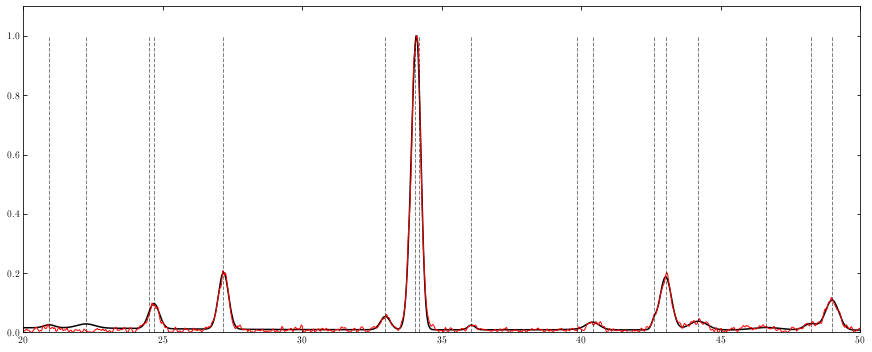

In [959]:
figure(figsize=(15,6))
x,z = g1._z()
plot(x,z,'k-')
plot(g1.spectra.theta,g1.spectra.intensity,'-r',lw=1)
vlines(g1.mu,0,1,color='k',ls='--',alpha=0.5,lw=1)

xlim(20,50)
ylim(0,1.1)

In [49]:
for _ in range(24):
    g2.calibration(alpha=1)
g2.params,g2.sigma,g2.gamma

(array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
        0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
        0.1, 0.1, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. ]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
        0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
        0.1, 0.1]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [55]:
for _ in range(24):
    g2.iter_sigma(alpha=1)
g2.params,g2.sigma,g2.gamma

(array([-5.04167588e+11, -3.71641414e+12,  2.59047498e+11, -1.07041042e+12,
        -1.42064564e+12, -1.27769000e+11, -5.07701845e+09, -3.01215673e+09,
        -6.24688148e-02,  1.24058731e+09, -1.52925018e+08,  1.90926214e+08,
        -1.70949635e-01,  3.90716430e+12,  4.39394253e+09, -2.38540858e+12,
        -1.55759010e+11,  1.55890506e+10, -2.61243325e+09,  1.63070174e+00,
         7.74811538e+07, -1.62172182e+12,  8.92798989e+07, -4.16261090e+02,
         2.28799169e+14,  8.34374273e-04, -3.19562891e+09,  7.51260422e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.0

In [34]:
for _ in range(24):
    g2.iter_gamma(alpha=1)
g2.params,g2.sigma,g2.gamma

(array([ 1.41037964e+05,  6.98147386e-02,  1.15328038e-01, -1.78802382e-03,
        -8.50324652e+09, -4.17222448e+07,  9.52372918e-02,  2.19361947e+00,
         1.17732975e-01,  1.21604046e-01,  1.11674216e-01,  1.08574887e-01,
         1.18048728e-01,  1.18359477e-01,  1.19100506e-01,  6.56368720e+08,
         1.28790766e-01,  1.21264425e-01,  1.20303267e-01,  1.33985205e-01,
         1.15110391e-01,  1.19195822e-01,  1.16790253e-01,  1.24360204e-01,
         1.17886934e-01,  5.35767870e-02,  1.22364743e-01,  1.37736382e-01,
         1.96612889e+07, -2.33149695e+01, -7.21613327e+02, -3.36196756e+02,
         1.92275894e+06,  2.20331735e+06, -3.67604375e+04, -2.05594020e+03,
        -1.26054334e+04, -2.83833205e+03,  4.84987055e+05,  9.93957336e-02,
        -1.42525596e+04, -4.78149932e+03, -1.43527886e+04,  1.48411205e+08,
        -3.70435683e+03,  2.43469131e+05,  4.58386294e+04, -8.43817985e+02,
        -1.05270264e+04, -1.20610991e+04, -1.15356518e+04, -4.94895760e+03,
        -1.6

(0.0, 1.1)

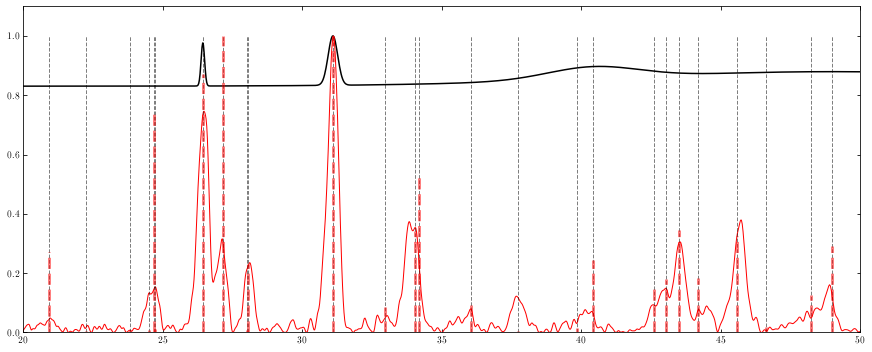

In [56]:
figure(figsize=(15,6))
x,z = g2._z()
plot(x,z,'k-')
plot(g2.spectra.theta,g2.spectra.intensity,'-r',lw=1)
vlines(g2.mu,0,1,color='k',ls='--',alpha=0.5,lw=1)
vlines(g2.mu,0,g2.intensity,color='r',ls='--',alpha=0.5,lw=3)

xlim(20,50)
ylim(0,1.1)

(0.0, 1.1)

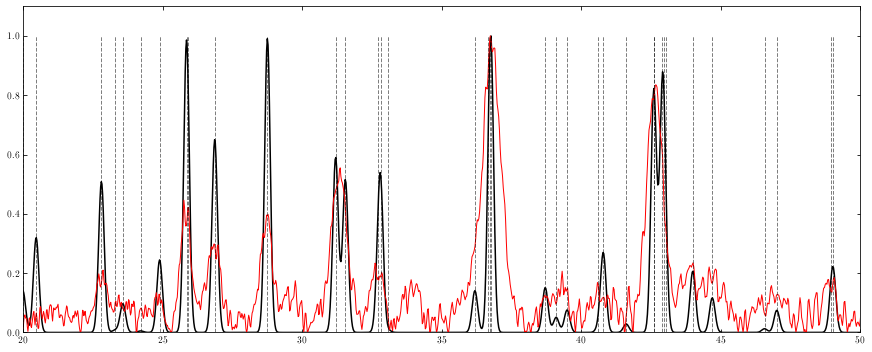

In [360]:
figure(figsize=(15,6))
x,z = g3._z()
plot(x,z,'k-')
plot(g3.spectra.theta,g3.spectra.intensity,'-r',lw=1)
vlines(g3.mu,0,1,color='k',ls='--',alpha=0.5,lw=1)

xlim(20,50)
ylim(0,1.1)

In [105]:
for _ in range(100):
    g4.sg(alpha=1)
g4.sigma,g4.gamma

(array([0.17718012, 0.20529592, 0.16018623, 0.18233464, 0.18696968,
        0.19491987, 0.19891641, 0.22417865, 0.19474023, 0.2177187 ]),
 array([0.46876492, 0.96116786, 1.06934779, 1.03256155, 0.76445794,
        0.85780893, 1.11347993, 1.33946949, 1.1448718 , 1.01803629]))

(0.0, 1.1)

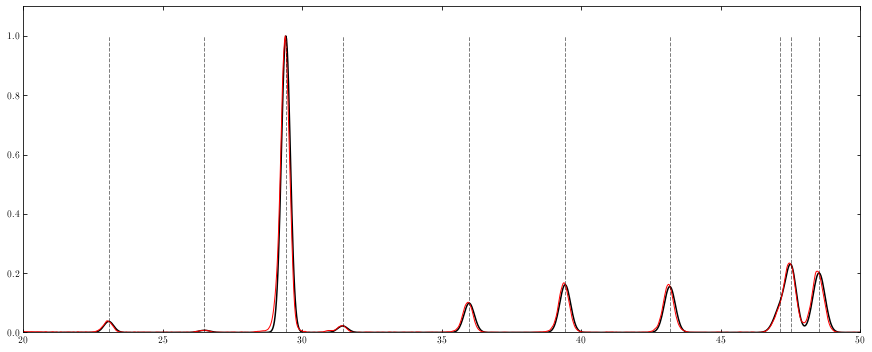

In [106]:
figure(figsize=(15,6))
x,z = g4._z()
plot(x,z,'k-')
plot(g4.spectra.theta,g4.spectra.intensity,'-r',lw=1)
vlines(g4.mu,0,1,color='k',ls='--',alpha=0.5,lw=1)

xlim(20,50)
ylim(0,1.1)